In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## Read Files

In [124]:
d1 = pd.read_csv('C:/Users/seeml/Desktop/summer_project/o1.csv',error_bad_lines = False, sep=",")
d2 = pd.read_csv('C:/Users/seeml/Desktop/summer_project/o2.csv',error_bad_lines = False, sep=",")

df = pd.concat([d1,d2],ignore_index=True)#[70000:]

In [125]:
# get the index of Tag value changes
Tag = df['Tag'].values.tolist()

index = np.where(np.roll(Tag,1) != Tag)[0]
# get the time of attack begins or stops
att_time = df['sec'][index]

In [133]:
#ip pair(‘192.168.1.60’, ‘192.168.1.20’)
#standarize the data and split the data into train and test
x1=df['ip2'].values
x1=x1.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
x1 = scaler.fit_transform(x1)
train_size = int(len(x1) * 0.4)
test_size = len(x1) - train_size
train, test = x1[0:train_size,:], x1[train_size:len(x1),:]

C:\Users\seeml\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# LSTM MODEL for the number of connections of IP pair

In [134]:
import matplotlib.pyplot as plt
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(2019)
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):

    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    #import pdb; pdb.set_trace()
    return np.array(dataX),np.array(dataY)

look_back = 50
trainX,trainY  = create_dataset(train,look_back)
testX, testY = create_dataset(test, look_back)



trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1000, verbose=2)


Epoch 1/20
 - 11s - loss: 0.0217
Epoch 2/20
 - 4s - loss: 0.0014
Epoch 3/20
 - 5s - loss: 0.0013
Epoch 4/20
 - 5s - loss: 0.0013
Epoch 5/20
 - 4s - loss: 0.0013
Epoch 6/20
 - 4s - loss: 0.0013
Epoch 7/20
 - 5s - loss: 0.0013
Epoch 8/20
 - 4s - loss: 0.0013
Epoch 9/20
 - 4s - loss: 0.0012
Epoch 10/20
 - 4s - loss: 0.0012
Epoch 11/20
 - 5s - loss: 0.0012
Epoch 12/20
 - 4s - loss: 0.0012
Epoch 13/20
 - 4s - loss: 0.0012
Epoch 14/20
 - 5s - loss: 0.0012
Epoch 15/20
 - 4s - loss: 0.0012
Epoch 16/20
 - 4s - loss: 0.0012
Epoch 17/20
 - 4s - loss: 0.0012
Epoch 18/20
 - 5s - loss: 0.0012
Epoch 19/20
 - 5s - loss: 0.0012
Epoch 20/20
 - 4s - loss: 0.0012


In [135]:
#Predictions
testPredict = model.predict(testX)

#scaler inverse
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

from scipy.spatial import distance
#calucalte the euclidean distance for prediction and actual data
dst = []
for i in range(len(testY)):
    dst.append(distance.euclidean(testY[i], testPredict[i]))


In [137]:
#get the time (x-axis)
time = np.array(range((train_size+51),len(x1)))
time.reshape(-1,1)

array([[ 422240],
       [ 422241],
       [ 422242],
       ...,
       [1055470],
       [1055471],
       [1055472]])

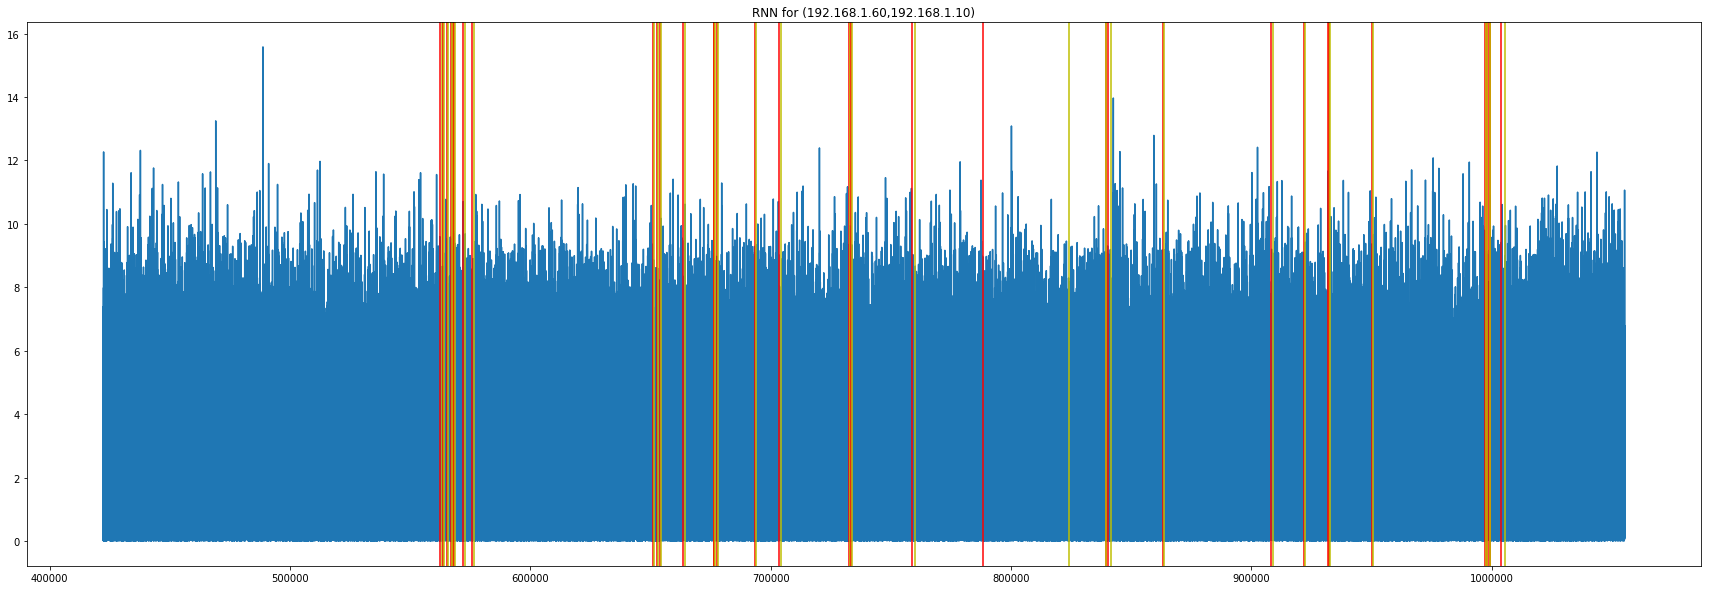

In [138]:
#plot the distance

plt.figure(figsize=(30,10))
plt.title('RNN for (192.168.1.60,192.168.1.10)')

plt.plot(time,dst)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (att_time.iloc[i]),color='r')
    else:
        plt.axvline(x= (att_time.iloc[i]),color='y')



## LSTM for Physical data(simple trial)

In [139]:
# read the data
d1 = pd.read_csv('C:/Users/seeml/Desktop/summer_project/SWaT_Dataset_Normal_v1.csv',error_bad_lines = False, sep=",")
d2 = pd.read_csv('C:/Users/seeml/Desktop/summer_project/SWaT_Dataset_Attack_v0.csv',error_bad_lines = False, sep=",")

df = pd.concat([d1,d2],ignore_index=True)

In [140]:
#use the data of LIT101
#standarize the data and split the data into train and test
x1=df['LIT101'].values
x1=x1.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
x1 = scaler.fit_transform(x1)
train_size = int(len(x1) * 0.45)
test_size = len(x1) - train_size
train, test = x1[0:train_size,:], x1[train_size:len(x1),:]

In [141]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):

    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    #import pdb; pdb.set_trace()
    return np.array(dataX),np.array(dataY)

look_back = 50
trainX,trainY  = create_dataset(train,look_back)
testX, testY = create_dataset(test, look_back)



trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1000, verbose=2)


Epoch 1/20
 - 12s - loss: 0.0052
Epoch 2/20
 - 5s - loss: 1.0562e-04
Epoch 3/20
 - 5s - loss: 9.9259e-05
Epoch 4/20
 - 6s - loss: 9.1302e-05
Epoch 5/20
 - 5s - loss: 8.1833e-05
Epoch 6/20
 - 5s - loss: 7.1053e-05
Epoch 7/20
 - 6s - loss: 5.9047e-05
Epoch 8/20
 - 5s - loss: 4.6036e-05
Epoch 9/20
 - 5s - loss: 3.2651e-05
Epoch 10/20
 - 5s - loss: 2.0058e-05
Epoch 11/20
 - 5s - loss: 1.0761e-05
Epoch 12/20
 - 5s - loss: 6.0328e-06
Epoch 13/20
 - 5s - loss: 4.3827e-06
Epoch 14/20
 - 5s - loss: 3.8342e-06
Epoch 15/20
 - 5s - loss: 3.7084e-06
Epoch 16/20
 - 5s - loss: 3.7273e-06
Epoch 17/20
 - 5s - loss: 3.6120e-06
Epoch 18/20
 - 5s - loss: 3.7123e-06
Epoch 19/20
 - 5s - loss: 3.6073e-06
Epoch 20/20
 - 5s - loss: 3.4748e-06


In [142]:
#Predictions
testPredict = model.predict(testX)

#scaler inverse
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

from scipy.spatial import distance
#calucalte the euclidean distance for prediction and actual data
dst = []
for i in range(len(testY)):
    dst.append(distance.euclidean(testY[i], testPredict[i]))


In [143]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal


In [147]:
# get the index of Tag value changes
label = df['Normal/Attack'].values.tolist()

index1 = np.where(np.roll(label,1) != label)[0]


In [145]:
#get the time (x-axis)
time = np.array(range((train_size+51),len(x1)))
time.reshape(-1,1)

array([[425264],
       [425265],
       [425266],
       ...,
       [944916],
       [944917],
       [944918]])

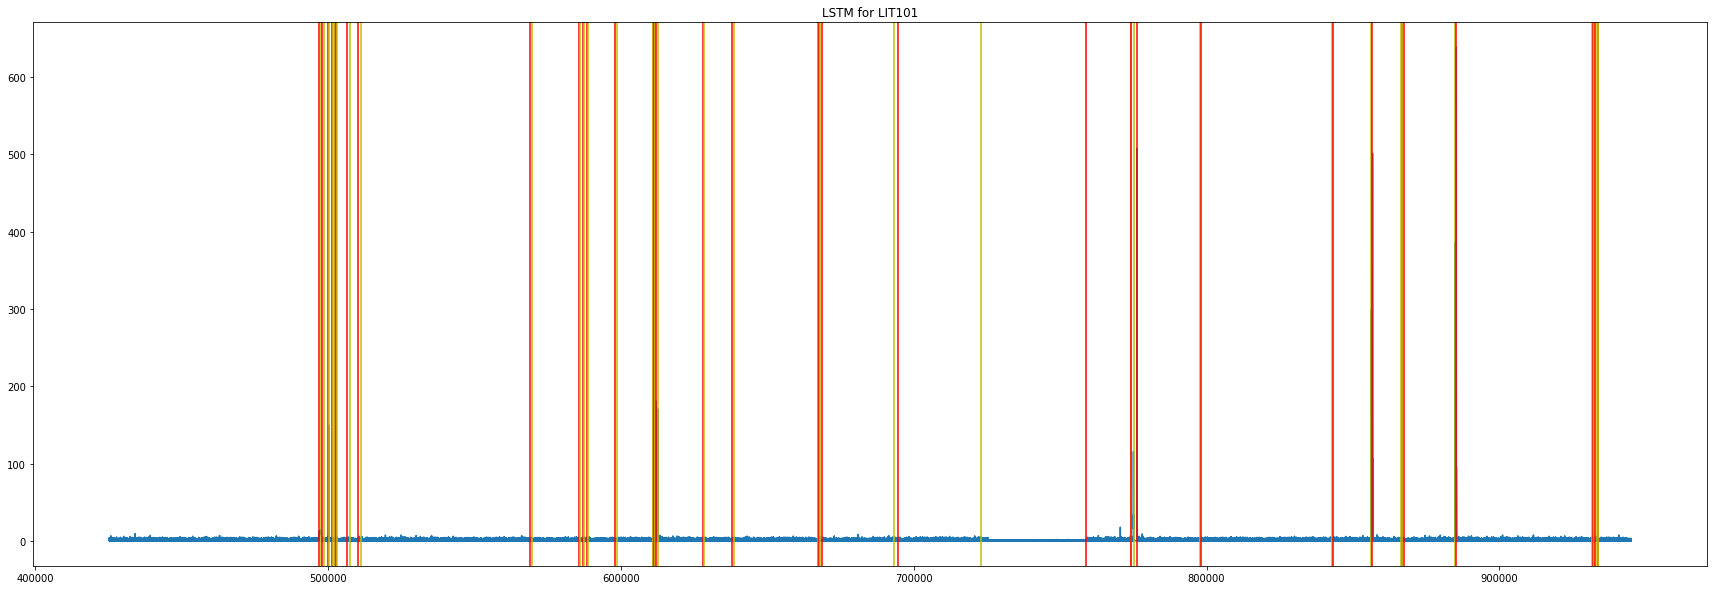

In [148]:
#plot the distance
plt.figure(figsize=(30,10))
plt.title('LSTM for LIT101')
plt.plot(time,dst)
#red line means the start of the attack and yellow lines means the end of attack
for i in range(len(att_time)):
    if i%2 == 0:
        plt.axvline(x= (index1[i]),color='r')
    else:
        plt.axvline(x= (index1[i]),color='y')
plt.savefig("phys.png")